<a href="https://colab.research.google.com/github/xhavien/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7

Text Generation using LSTM

In [145]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt \
    -O /tmp/snowwhite.txt

data = open('/tmp/snowwhite.txt').read()

--2025-05-27 09:32:39--  https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [text/plain]
Saving to: ‘/tmp/snowwhite.txt’

/tmp/snowwhite.txt  100%[===================>]   1.48K  --.-KB/s    in 0s      

2025-05-27 09:32:39 (31.8 MB/s) - ‘/tmp/snowwhite.txt’ saved [1520/1520]



In [147]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Create the LSTM model

1. Build an LSTM

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Build a More Focused LSTM Model
model = Sequential()

# Embedding layer - optimized for small dataset
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))

# Two LSTM layers for better pattern learning
model.add(LSTM(100, return_sequences=True, dropout=0.2))
model.add(LSTM(100, dropout=0.3))

# Dense layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(total_words, activation='softmax'))

# Optimizer with lower learning rate for stable training
optimizer = Adam(learning_rate=0.001)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

# Training with early stopping
early_stopping = EarlyStopping(monitor='loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(
    predictors,
    label,
    epochs=80,
    verbose=1,
    batch_size=32,  # Smaller batch for better learning
    callbacks=[early_stopping]
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0167 - loss: 5.0793
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0199 - loss: 5.0610
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0273 - loss: 4.9998
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0406 - loss: 4.9272
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0428 - loss: 4.8758
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0286 - loss: 4.7946
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0604 - loss: 4.7788
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0373 - loss: 4.8477
Epoch 9/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0608 - loss: 4.6626
Epoch 10/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0278 - loss: 4.7684
Epoch 11/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0706 - loss: 4.7486
Epoch 12/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0398 - loss: 4.7

In [149]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2020 - loss: 2.9895
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2607 - loss: 2.9695
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2171 - loss: 2.8899
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1930 - loss: 2.9986
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2133 - loss: 2.9910
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1759 - loss: 2.9785
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2518 - loss: 2.8676
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2009 - loss: 2.9025
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2061 - loss: 2.9383
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2337 - loss: 2.8626
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2390 - loss: 2.9040
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2032 - lo

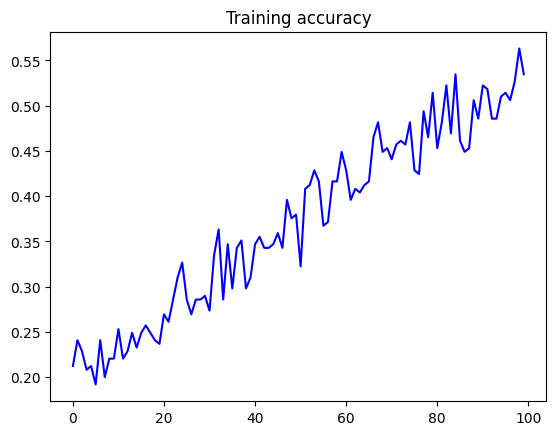

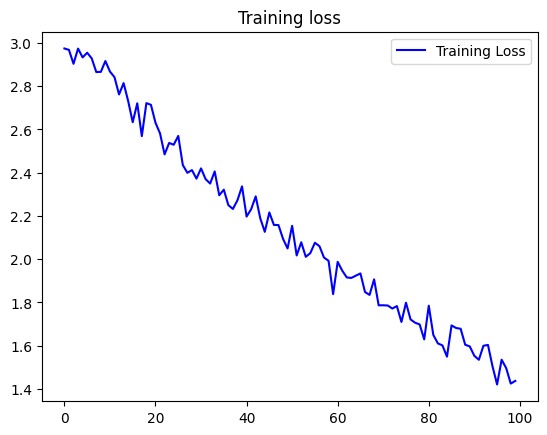

In [150]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## B. Generate texts


2. "Snow White lived in the forest with..."

In [151]:
def generate_snow_white_continuation(seed_text="Snow White lived in the forest with", max_words=100):
    """Generate Snow White text that follows the dataset patterns"""

    original_seed = seed_text
    generated_text = seed_text
    word_history = []
    consecutive_repeats = 0

    print(f"Starting with: '{seed_text}'")
    print("Generating continuation from Snow White dataset...\n")

    for step in range(max_words):
        # Prepare input
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Get predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # STRONG Anti-repetition measures

        # 1. Heavily penalize recently used words
        for i, word_idx in enumerate(word_history[-12:]):
            if word_idx < len(predictions):
                penalty = 0.3 ** (12 - i)  # Stronger penalty for more recent words
                predictions[word_idx] *= penalty

        # 2. Extra penalty for immediate repetition
        if len(word_history) > 0 and word_history[-1] < len(predictions):
            predictions[word_history[-1]] *= 0.1

        # 3. Remove very low probability words to avoid nonsense
        threshold = np.max(predictions) * 0.01
        predictions[predictions < threshold] = 0

        # 4. Renormalize
        if np.sum(predictions) == 0:
            predictions = np.ones(len(predictions)) / len(predictions)
        else:
            predictions = predictions / np.sum(predictions)

        # 5. Conservative temperature sampling
        temperature = 0.7
        predictions = np.log(predictions + 1e-10) / temperature
        predictions = np.exp(predictions)
        predictions = predictions / np.sum(predictions)

        # 6. Top-k sampling to limit to reasonable words
        k = min(20, len(predictions))
        top_k_idx = np.argpartition(predictions, -k)[-k:]
        top_k_probs = np.zeros_like(predictions)
        top_k_probs[top_k_idx] = predictions[top_k_idx]
        top_k_probs = top_k_probs / np.sum(top_k_probs)

        # Sample next word
        predicted = np.random.choice(len(predictions), p=top_k_probs)

        # Convert to word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        if output_word == "":
            continue

        # Check for immediate repetition
        words_in_text = generated_text.split()
        if len(words_in_text) > 0 and output_word == words_in_text[-1]:
            consecutive_repeats += 1
            if consecutive_repeats > 2:  # Skip if repeating too much
                continue
        else:
            consecutive_repeats = 0

        # Add word to generated text
        generated_text += " " + output_word
        word_history.append(predicted)

        # Stop at natural sentence boundaries
        if output_word in ['.', '!', '?'] and len(generated_text.split()) > 20:
            break

        # Emergency stop for very long generation
        if len(generated_text.split()) > 150:
            break

    return generated_text

# Better function for dataset-consistent generation
def generate_from_dataset_pattern(seed="Snow White lived in the forest with", words=100):
    """Generate text that should match Snow White dataset patterns"""

    # Use lower temperature for more conservative, dataset-like generation
    result = generate_snow_white_continuation(seed, words)
    return result

# Generate Snow White text matching the dataset
print("=" * 70)
print("SNOW WHITE DATASET-BASED GENERATION")
print("=" * 70)

# Main generation
story = generate_from_dataset_pattern("Snow White lived in the forest with", 100)
print(f"GENERATED STORY:\n{story}")


# Simple test function
def test_generation(prompt):
    """Quick test function"""
    return generate_from_dataset_pattern(prompt, 30)

print(f"\nQuick test with 'Snow White lived in the forest with':")
quick_result = test_generation("Snow White lived in the forest with")
print(quick_result)

SNOW WHITE DATASET-BASED GENERATION
Starting with: 'Snow White lived in the forest with'
Generating continuation from Snow White dataset...

GENERATED STORY:
Snow White lived in the forest with her did calling return one off ran and little rich ran spot little tree say tree excuse it one off and one rich ran this little ran little tree tree it say off off one rich one and excuse ran little innocent tree little tree say off it off rich one and ran ran spot ran little excuse say tree it off off rich and one and spot ran little ran say tree it tree excuse off off rich off and one little ran little calling innocent tree say it last rich off off and off ran little one a

Quick test with 'Snow White lived in the forest with':
Starting with: 'Snow White lived in the forest with'
Generating continuation from Snow White dataset...

Snow White lived in the forest with began to cry one spot off ran and little rich little say innocent tree it excuse last excuse one ran off off and little rich litt

3. "The queen looked into the mirror and said..."

In [152]:
def generate_snow_white_continuation(seed_text="The queen looked into the mirror and said", max_words=100):
    """Generate Snow White text that follows the dataset patterns"""

    original_seed = seed_text
    generated_text = seed_text
    word_history = []
    consecutive_repeats = 0

    print(f"Starting with: '{seed_text}'")
    print("Generating continuation from Snow White dataset...\n")

    for step in range(max_words):
        # Prepare input
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Get predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # STRONG Anti-repetition measures

        # 1. Heavily penalize recently used words
        for i, word_idx in enumerate(word_history[-12:]):
            if word_idx < len(predictions):
                penalty = 0.3 ** (12 - i)  # Stronger penalty for more recent words
                predictions[word_idx] *= penalty

        # 2. Extra penalty for immediate repetition
        if len(word_history) > 0 and word_history[-1] < len(predictions):
            predictions[word_history[-1]] *= 0.1

        # 3. Remove very low probability words to avoid nonsense
        threshold = np.max(predictions) * 0.01
        predictions[predictions < threshold] = 0

        # 4. Renormalize
        if np.sum(predictions) == 0:
            predictions = np.ones(len(predictions)) / len(predictions)
        else:
            predictions = predictions / np.sum(predictions)

        # 5. Conservative temperature sampling
        temperature = 0.7
        predictions = np.log(predictions + 1e-10) / temperature
        predictions = np.exp(predictions)
        predictions = predictions / np.sum(predictions)

        # 6. Top-k sampling to limit to reasonable words
        k = min(20, len(predictions))
        top_k_idx = np.argpartition(predictions, -k)[-k:]
        top_k_probs = np.zeros_like(predictions)
        top_k_probs[top_k_idx] = predictions[top_k_idx]
        top_k_probs = top_k_probs / np.sum(top_k_probs)

        # Sample next word
        predicted = np.random.choice(len(predictions), p=top_k_probs)

        # Convert to word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        if output_word == "":
            continue

        # Check for immediate repetition
        words_in_text = generated_text.split()
        if len(words_in_text) > 0 and output_word == words_in_text[-1]:
            consecutive_repeats += 1
            if consecutive_repeats > 2:  # Skip if repeating too much
                continue
        else:
            consecutive_repeats = 0

        # Add word to generated text
        generated_text += " " + output_word
        word_history.append(predicted)

        # Stop at natural sentence boundaries
        if output_word in ['.', '!', '?'] and len(generated_text.split()) > 20:
            break

        # Emergency stop for very long generation
        if len(generated_text.split()) > 150:
            break

    return generated_text

# Better function for dataset-consistent generation
def generate_from_dataset_pattern(seed="The queen looked into the mirror and said", words=100):
    """Generate text that should match Snow White dataset patterns"""

    # Use lower temperature for more conservative, dataset-like generation
    result = generate_snow_white_continuation(seed, words)
    return result

# Generate Snow White text matching the dataset
print("=" * 70)
print("SNOW WHITE DATASET-BASED GENERATION")
print("=" * 70)

# Main generation
story = generate_from_dataset_pattern("The queen looked into the mirror and said", 100)
print(f"GENERATED STORY:\n{story}")


# Simple test function
def test_generation(prompt):
    """Quick test function"""
    return generate_from_dataset_pattern(prompt, 30)

print(f"\nQuick test with 'The queen looked into the mirror and said':")
quick_result = test_generation("The queen looked into the mirror and said")
print(quick_result)

SNOW WHITE DATASET-BASED GENERATION
Starting with: 'The queen looked into the mirror and said'
Generating continuation from Snow White dataset...

GENERATED STORY:
The queen looked into the mirror and said feel eyes with a tree little off rich and say ran one ran spot calling it innocent last excuse off little off and off one ran rich tree spot say it innocent calling little little and off off ran ran one rich a tree say tree excuse little and little off off ran one rich one last innocent tree say excuse it little little off ran off ran rich one and last a excuse say return little little tree innocent tree off ran one rich ran and off excuse return little last say tree innocent tree it rich one ran

Quick test with 'The queen looked into the mirror and said':
Starting with: 'The queen looked into the mirror and said'
Generating continuation from Snow White dataset...

The queen looked into the mirror and said asleep curled with a tree little off rich under it say and ran ran one spot o

4. "One day, Snow White found a small cottage and..."

In [153]:
def generate_snow_white_continuation(seed_text="One day, Snow White found a small cottage and", max_words=100):
    """Generate Snow White text that follows the dataset patterns"""

    original_seed = seed_text
    generated_text = seed_text
    word_history = []
    consecutive_repeats = 0

    print(f"Starting with: '{seed_text}'")
    print("Generating continuation from Snow White dataset...\n")

    for step in range(max_words):
        # Prepare input
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Get predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # STRONG Anti-repetition measures

        # 1. Heavily penalize recently used words
        for i, word_idx in enumerate(word_history[-12:]):
            if word_idx < len(predictions):
                penalty = 0.3 ** (12 - i)  # Stronger penalty for more recent words
                predictions[word_idx] *= penalty

        # 2. Extra penalty for immediate repetition
        if len(word_history) > 0 and word_history[-1] < len(predictions):
            predictions[word_history[-1]] *= 0.1

        # 3. Remove very low probability words to avoid nonsense
        threshold = np.max(predictions) * 0.01
        predictions[predictions < threshold] = 0

        # 4. Renormalize
        if np.sum(predictions) == 0:
            predictions = np.ones(len(predictions)) / len(predictions)
        else:
            predictions = predictions / np.sum(predictions)

        # 5. Conservative temperature sampling
        temperature = 0.7
        predictions = np.log(predictions + 1e-10) / temperature
        predictions = np.exp(predictions)
        predictions = predictions / np.sum(predictions)

        # 6. Top-k sampling to limit to reasonable words
        k = min(20, len(predictions))
        top_k_idx = np.argpartition(predictions, -k)[-k:]
        top_k_probs = np.zeros_like(predictions)
        top_k_probs[top_k_idx] = predictions[top_k_idx]
        top_k_probs = top_k_probs / np.sum(top_k_probs)

        # Sample next word
        predicted = np.random.choice(len(predictions), p=top_k_probs)

        # Convert to word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        if output_word == "":
            continue

        # Check for immediate repetition
        words_in_text = generated_text.split()
        if len(words_in_text) > 0 and output_word == words_in_text[-1]:
            consecutive_repeats += 1
            if consecutive_repeats > 2:  # Skip if repeating too much
                continue
        else:
            consecutive_repeats = 0

        # Add word to generated text
        generated_text += " " + output_word
        word_history.append(predicted)

        # Stop at natural sentence boundaries
        if output_word in ['.', '!', '?'] and len(generated_text.split()) > 20:
            break

        # Emergency stop for very long generation
        if len(generated_text.split()) > 150:
            break

    return generated_text

# Better function for dataset-consistent generation
def generate_from_dataset_pattern(seed="One day, Snow White found a small cottage and", words=100):
    """Generate text that should match Snow White dataset patterns"""

    # Use lower temperature for more conservative, dataset-like generation
    result = generate_snow_white_continuation(seed, words)
    return result

# Generate Snow White text matching the dataset
print("=" * 70)
print("SNOW WHITE DATASET-BASED GENERATION")
print("=" * 70)

# Main generation
story = generate_from_dataset_pattern("One day, Snow White found a small cottage and", 100)
print(f"GENERATED STORY:\n{story}")


# Simple test function
def test_generation(prompt):
    """Quick test function"""
    return generate_from_dataset_pattern(prompt, 30)

print(f"\nQuick test with 'One day, Snow White found a small cottage and':")
quick_result = test_generation("One day, Snow White found a small cottage and")
print(quick_result)

SNOW WHITE DATASET-BASED GENERATION
Starting with: 'One day, Snow White found a small cottage and'
Generating continuation from Snow White dataset...

GENERATED STORY:
One day, Snow White found a small cottage and when came her with rich one little off ran off spot ran innocent tree it say and rich one little little last off excuse ran innocent tree it calling spot and one rich little one off off ran say tree tree innocent it and spot rich little one little off ran off say tree innocent it and excuse rich calling one little last ran off off little innocent ran and tree rich spot excuse one say last a off little calling innocent little ran rich ran and one excuse spot return off off say tree little tree rich ran rich

Quick test with 'One day, Snow White found a small cottage and':
Starting with: 'One day, Snow White found a small cottage and'
Generating continuation from Snow White dataset...

One day, Snow White found a small cottage and great the she fatal one ran say off little and 

In [154]:
def generate_snow_white_continuation(seed_text="Snow White is", max_words=100):
    """Generate Snow White text that follows the dataset patterns"""

    original_seed = seed_text
    generated_text = seed_text
    word_history = []
    consecutive_repeats = 0

    print(f"Starting with: '{seed_text}'")
    print("Generating continuation from Snow White dataset...\n")

    for step in range(max_words):
        # Prepare input
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

        # Get predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # STRONG Anti-repetition measures

        # 1. Heavily penalize recently used words
        for i, word_idx in enumerate(word_history[-12:]):
            if word_idx < len(predictions):
                penalty = 0.3 ** (12 - i)  # Stronger penalty for more recent words
                predictions[word_idx] *= penalty

        # 2. Extra penalty for immediate repetition
        if len(word_history) > 0 and word_history[-1] < len(predictions):
            predictions[word_history[-1]] *= 0.1

        # 3. Remove very low probability words to avoid nonsense
        threshold = np.max(predictions) * 0.01
        predictions[predictions < threshold] = 0

        # 4. Renormalize
        if np.sum(predictions) == 0:
            predictions = np.ones(len(predictions)) / len(predictions)
        else:
            predictions = predictions / np.sum(predictions)

        # 5. Conservative temperature sampling
        temperature = 0.7
        predictions = np.log(predictions + 1e-10) / temperature
        predictions = np.exp(predictions)
        predictions = predictions / np.sum(predictions)

        # 6. Top-k sampling to limit to reasonable words
        k = min(20, len(predictions))
        top_k_idx = np.argpartition(predictions, -k)[-k:]
        top_k_probs = np.zeros_like(predictions)
        top_k_probs[top_k_idx] = predictions[top_k_idx]
        top_k_probs = top_k_probs / np.sum(top_k_probs)

        # Sample next word
        predicted = np.random.choice(len(predictions), p=top_k_probs)

        # Convert to word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        if output_word == "":
            continue

        # Check for immediate repetition
        words_in_text = generated_text.split()
        if len(words_in_text) > 0 and output_word == words_in_text[-1]:
            consecutive_repeats += 1
            if consecutive_repeats > 2:  # Skip if repeating too much
                continue
        else:
            consecutive_repeats = 0

        # Add word to generated text
        generated_text += " " + output_word
        word_history.append(predicted)

        # Stop at natural sentence boundaries
        if output_word in ['.', '!', '?'] and len(generated_text.split()) > 20:
            break

        # Emergency stop for very long generation
        if len(generated_text.split()) > 150:
            break

    return generated_text

# Better function for dataset-consistent generation
def generate_from_dataset_pattern(seed="Snow White is", words=100):
    """Generate text that should match Snow White dataset patterns"""

    # Use lower temperature for more conservative, dataset-like generation
    result = generate_snow_white_continuation(seed, words)
    return result

# Generate Snow White text matching the dataset
print("=" * 70)
print("SNOW WHITE DATASET-BASED GENERATION")
print("=" * 70)

# Main generation
story = generate_from_dataset_pattern("Snow White is", 100)
print(f"GENERATED STORY:\n{story}")


# Simple test function
def test_generation(prompt):
    """Quick test function"""
    return generate_from_dataset_pattern(prompt, 30)

print(f"\nQuick test with 'Snow White is':")
quick_result = test_generation("Snow White is")
print(quick_result)

SNOW WHITE DATASET-BASED GENERATION
Starting with: 'Snow White is'
Generating continuation from Snow White dataset...

GENERATED STORY:
Snow White is in the land forest far away to cry one rich off little little ran innocent ran spot excuse say and and one rich off off little tree little tree innocent it spot ran and ran one rich off off off little say tree tree excuse innocent it ran one rich and ran off off little off little excuse tree tree innocent one rich rich ran and ran a off little off excuse it say one tree rich spot and ran ran ran little off last off say excuse it rich rich one spot and ran little ran little off say

Quick test with 'Snow White is':
Starting with: 'Snow White is'
Generating continuation from Snow White dataset...

Snow White is the all in land dark forest away to spot fatal little one off rich ran little ran and off and tree excuse spot it last say rich innocent little ran
